<a href="https://colab.research.google.com/github/RabbitKM/Exercise/blob/main/web%20crawler/ST_crawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 套件安裝

In [ ]:
import requests
import io
import json
import prettytable

import matplotlib.pyplot as plt
from PIL import Image

from collections import Counter

### 0. 圖列查詢結果

In [ ]:
def plot(ret, id_list):
  plt.figure(figsize=(15, (len(id_list)//10)*3))
  width = 10
  height = len(id_list) // width + 1
  for i in range(len(id_list)):
    url = ret['items'][id_list[i]]['content_thumb_extra_large_url']
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert("RGB")

    plt.subplot(height, width, i+1)
    t = "{}\nW:{}\nH:{} ({})".format(id_list[i], img.width, img.height, i)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

### 1. 關鍵字(cuttlefish)

In [ ]:
# Image搜尋
def method1_image(page, limit, name):
  req = requests.get(
      'https://stock.adobe.com/tw/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[include_stock_enterprise]': '0',
          'filters[content_type:image]': '1',
          'filters[order]': 'relevance',
          'k': name,
          'order': 'relevance',
          'safe_search': '1',
          'limit': limit,
          'search_type': 'asset-type-change',
          'search_page': page,
          'price[$]': '1',
          'get_facets': '1',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

In [ ]:
# Premium
def method1_premium(page, limit, name):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$$]': '1',
          'price[$$$]': '1',
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'usertyped',
          'acp': '',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 2. 關鍵字(cuttlefish) + find-similar

In [ ]:
# Image搜尋
def method2_image(page, limit, name, similar_content_id):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$]': '1',  # Premium無此行
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'details-find-similar',
          'serie_id': '',
          'model_id': '',
          'native_visual_search': '',
          'similar_content_id': similar_content_id,
          'find_similar_by': 'all',
          'get_facets': '0', # Premium無此行
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

In [ ]:
# Premium搜尋
def method2_premium(page, limit, name, similar_content_id):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$$]': '1', # Image無此行
          'price[$$$]': '1', # Image無此行
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'details-find-similar',
          'serie_id': '',
          'model_id': '',
          'native_visual_search': '',
          'similar_content_id': similar_content_id, # 以圖搜尋的id
          'find_similar_by': 'all',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 3. 上傳圖片找圖
62cdac6e2152f  
`C:\Users\USER\Desktop\目錄\20220311_緯育課程\09_專題與分組\04_第四組團專相關\04_頭足類照片\0619大溪漁港\上傳用\02_室內\02_花枝\B-P1-146.JPG`

62ced2af90571  
`C:\Users\USER\Desktop\目錄\20220311_緯育課程\09_專題與分組\04_第四組團專相關\04_頭足類照片\0619大溪漁港\上傳用\02_室內\02_花枝_多隻\M-P1-003.JPG`

In [ ]:
# Image搜尋
def method3_image(page, limit, name, similar_content_id, native_visual_search):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:image]': '1',
          'order': 'relevance',
          'price[$]': '1', #
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'visual-search-browse',
          'k': name,
          'native_visual_search': native_visual_search,
          'similar_content_id': similar_content_id,
          'model_id': '',
          'serie_id': '',
          'find_similar_by': 'all',
          'get_facets': '0', #
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

In [ ]:
# Premium搜尋
def method3_premium(page, limit, name, similar_content_id, native_visual_search):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:image]': '1',
          'order': 'relevance',
          'price[$$]': '1', #
          'price[$$$]': '1', #
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'visual-search-browse',
          'k': name,
          'native_visual_search': native_visual_search,
          'similar_content_id': similar_content_id,
          'model_id': '',
          'serie_id': '',
          'find_similar_by': 'all',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 參考對照(宛臻寫法)

In [ ]:
'''
from bs4 import BeautifulSoup
import requests
name = 0    #  設定圖片編號
for p in range(1,6,1):
  req = requests.get("https://stock.adobe.com/uk/search/images",
          headers= {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36",
                "cookies":"",
                "referer":"https://stock.adobe.com/"},
          params= {"filters%5Bcontent_type%3Aphoto%5D":1,
                "filters%5Bcontent_type%3Azip_vector%5D":1,
                "filters%5Bcontent_type%3Aillustration%5D":1,
                "filters%5Bcontent_type%3Avideo%5D":0,
                "filters%5Bcontent_type%3Atemplate%5D":0,
                "filters%5Bcontent_type%3A3d%5D":0,
                "filters%5Bcontent_type%3Aaudio%5D":0,
                "filters%5Bcontent_type%3Aimage%5D":1,
                "filters%5Binclude_stock_enterprise%5D":0,
                "filters%5Bis_editorial%5D":0,
                "k":"squid",
                "order":"relevance",
                "price%5B%24%5D":1,
                "safe_search":1,
                "similar_content_id":440520360,
                "search_page":p,
                "get_facets":0,
                "search_type":"pagination",
                },
          data={})
  p1 = BeautifulSoup(req.text, "html.parser")
  imgs = p1.find_all('img')

  for i in imgs:
      if 'src' in i.attrs:
          if i['src'].endswith('.jpg'):
              jpg = requests.get(i['src']) # 使用 requests 讀取圖片網址，取得圖片編碼
              
              print("編號:",name,i['src'])
              
              with open(f'/content/drive/MyDrive/06_緯育/12_團體專題_個人/爬蟲test/squid_image/{name}.jpg', 'wb') as f:
                f.write(jpg.content)   # 寫入圖片的 content
              name = name + 1
'''

### 主程式

In [ ]:
# Image搜尋
ret1, id_list1 = method1_image(1, 50, 'cuttlefish')
ret2, id_list2 = method2_image(1, 50, 'cuttlefish', '104342739')
ret3, id_list3 = method3_image(1, 50, 'cuttlefish', '', '62ced504277b7')

# premium搜尋
p_ret1, p_id_list1 = method1_premium(1, 12, 'cuttlefish')
p_ret2, p_id_list2 = method2_premium(1, 12, 'cuttlefish', '104342739')
p_ret3, p_id_list3 = method3_premium(1, 50, 'cuttlefish', '', '62ced504277b7')

# 檢查重複值
def check(tmp):
  return [k for (k,v) in tmp.items() if v > 1]

all_id_list = id_list2 + id_list3 + p_id_list2 + p_id_list3
c_all = dict(Counter(all_id_list))
c_over1 = check(c_all)

print('全部張數:', len(all_id_list))
print('不重複張數:', len(c_all))
print('重複id數:', len(c_over1), c_over1)

全部張數: 162
重複id數: 2 ['159055279', '309437879']


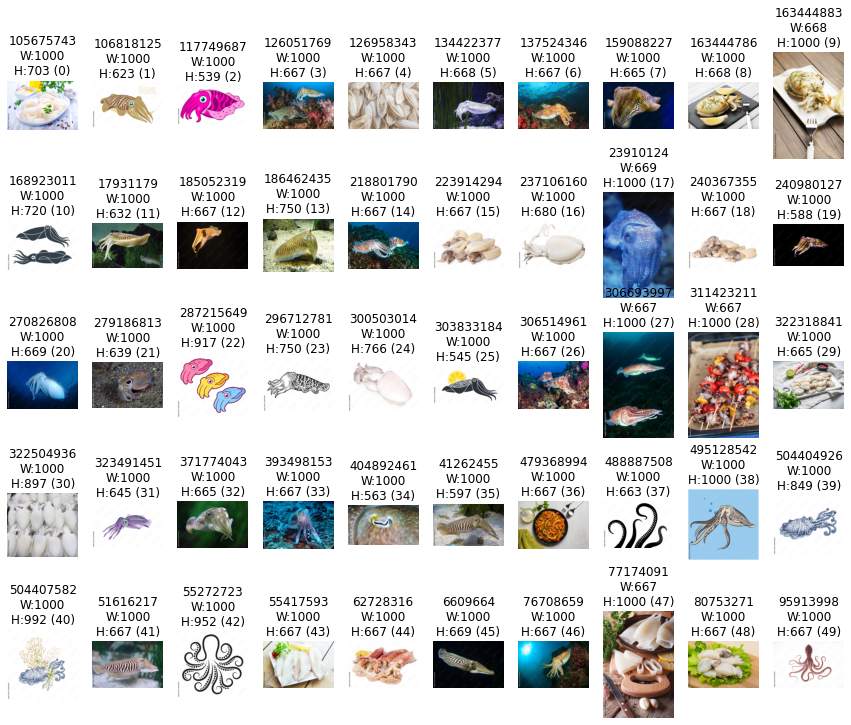

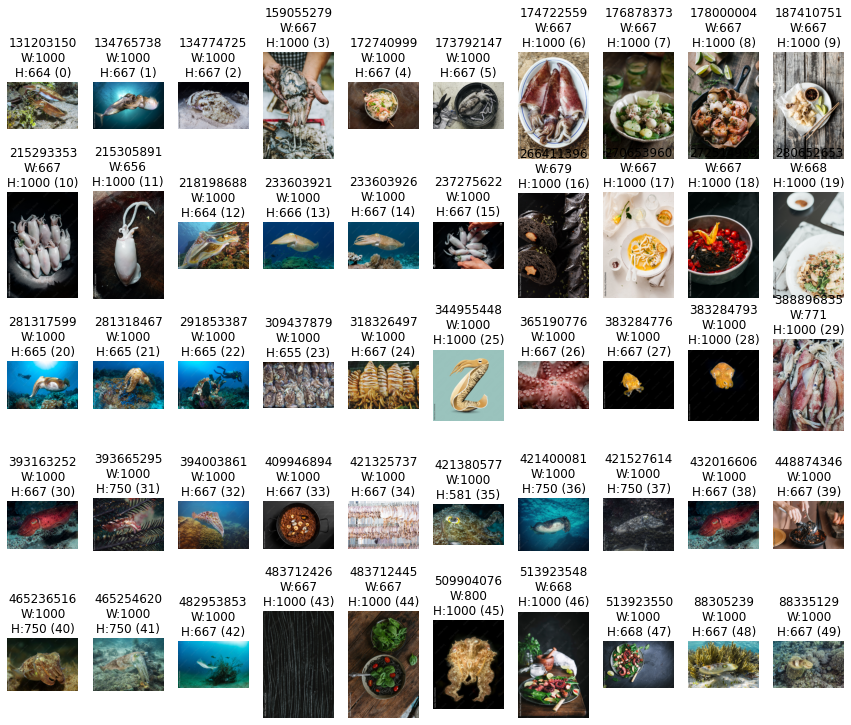

In [68]:
# 看一下圖片
# plot(ret1, id_list1)
# plot(ret2, id_list2)
plot(ret3, id_list3)
# plot(p_ret1, p_id_list1)
# plot(p_ret2, p_id_list2)
plot(p_ret3, p_id_list3)